In [1]:
"""Load 'seperate_accuracy_final_V2.npy' obtained from 'Visualization.py'"""
import pandas as pd
import numpy as np
import os

%matplotlib inline
import torch

In [8]:
folder_path = os.path.join(os.getcwd(),"Result")
filename = "seperate_accuracy_final_V2.npy"
# filename = "seperate_accuracy_final.npy"
save_folder_path = os.path.join(os.getcwd(),"Result", "Visualize")
box_filename = "boxplot_final_GDice_V2.png"
cat_filename = "catplot_final_GDice_V2.png"
dist_filename = "dictplot_final_GDice_V2.png"

res = np.load(os.path.join(folder_path, filename))
# print(res.shape)
res_dice = res[:,:,:,0,:]
res_transpos = res_dice.transpose(0,2,1,3)
# res_HD = res[:,:,:,2,:]
# res_transpos = res_HD.transpose(0,2,1,3)
# res_ADDS = res[:,:,:,1,:]
# res_transpos = res_ADDS.transpose(0,2,1,3)

shape = res_transpos.shape
res_flatten = res_transpos.reshape((shape[0], shape[1], -1))[:, :6, :] #Array: (3, 6, 328)
print(res_flatten.shape)

res_transpos1 = res_flatten.transpose(1,2,0)

np.set_printoptions(threshold=np.inf)
print(res_transpos1.reshape((6,-1)).shape)
# res_transpos1[res_transpos1==-1] = 0
# num = np.sum(res_transpos1==-1)
# print(num)
print(np.mean(res_transpos1.reshape((6,-1)), axis=1))

(3, 6, 336)
(6, 1008)
[0.257403   0.15592387 0.16194443 0.15040737 0.1589917  0.14139499]


In [5]:
shape1 = res_flatten.shape

num = shape1[2]
# ["UNet_SGD", "UNet", "SCNN", "SRNN, L2=0.005", "SRNN", "SCSRN, 0.5SC+0.5SR"]
model_array0 = ["UNet_SGD"]*num + ["UNet"]*num +["SCNN"]*num + ["SRNN_V1"]*num + \
              ["SRNN_V2"]*num +["SCSRN"]*num
# model_array0 = ["UNet_SGD"]*num + ["UNet"]*num +["SCNN"]*num + ["SRNN_V1"]*num + \
#               ["SRNN_V2"]*num +["SCSRN_V1"]*num
model_array = model_array0*shape1[0]
tissue_num = shape1[2]*shape1[1]
tissue_array = ["RV"]*tissue_num + ["LV"]*tissue_num + ["Myo"]*tissue_num
print(len(model_array), len(tissue_array), len(res_flatten.flatten()))

res_dir = {
    "tissue_type": tissue_array,
    "model_name": model_array,
    "general_dice_value": res_flatten.flatten()
}
# res_tissue_dir = {
#     "orange": res_flatten[0].flatten(),
#     "green": res_flatten[1].flatten(),
#     "pink": res_flatten[2].flatten(),
#     "model_name": model_array
# }
df = pd.DataFrame(res_dir)
# df_final = df.set_index("model_name")
#显示所有行
# pd.set_option('display.max_rows', None)
# print(df[:1000])
df.head()

6048 6048 6048


,tissue_type,model_name,general_dice_value
0,RV,UNet_SGD,0.405287
1,RV,UNet_SGD,0.109631
2,RV,UNet_SGD,0.203139
3,RV,UNet_SGD,0.273096
4,RV,UNet_SGD,0.095961


D:\MySoftware\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  """


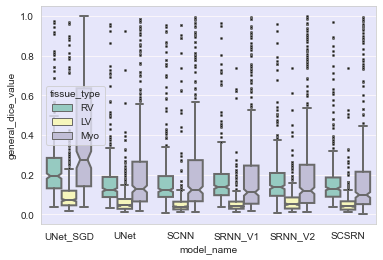

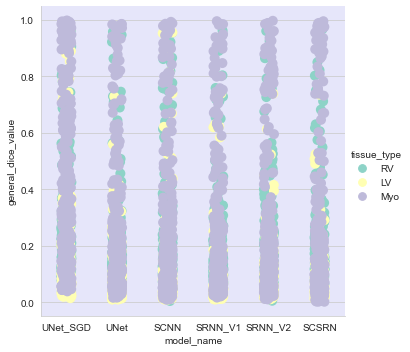

In [7]:
#调用seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='lavender'
plt.grid(b=True, which='major', axis='y', color="snow")

# Grouped boxplot 分组箱图
# x日期，y餐费，hue自组列，palette调色盘
# sns.scatterplot(x="model_name", y="dice_value", hue="tissue_type", data=df, palette="Set1")
# my_pal = {"orange": "orange", "green": "green", "pink":"pink"}
ax = sns.boxplot(x="model_name", y="general_dice_value", hue="tissue_type", data=df, notch=True,
                 linewidth=2, palette="Set3", showfliers=True, fliersize=2,
                 flierprops = {'marker':'o',#异常值形状
                          'markerfacecolor':'black',#形状填充色
                          'color':'black',#形状外廓颜色
                         })
# ax1 = sns.boxplot(x="model_name", y="HD_value", hue="tissue_type", data=df, notch=True,
#                  linewidth=2, palette="Set3", showfliers=False) #关闭异常值
box_fig = ax.get_figure()

box_fig.savefig(os.path.join(save_folder_path, box_filename))

# sns.stripplot(x='model_name', y='dice_value', hue="tissue_type", data=df, color="orange",
#                    jitter=0.2, size=2.5) #添加散点图

sns.catplot(x = "model_name", y = "general_dice_value", hue="tissue_type",
            s = 10, data = df, palette="Set3").fig.savefig(os.path.join(save_folder_path, cat_filename)) #气泡图

# sns.factorplot(x="model_name", y="dice_value", kind="box", hue="tissue_type", data=df)

D:\MySoftware\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\MySoftware\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\MySoftware\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\MySoftware\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\MySoftware\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\MySoftware\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\MySoftware\Anaconda3\lib\

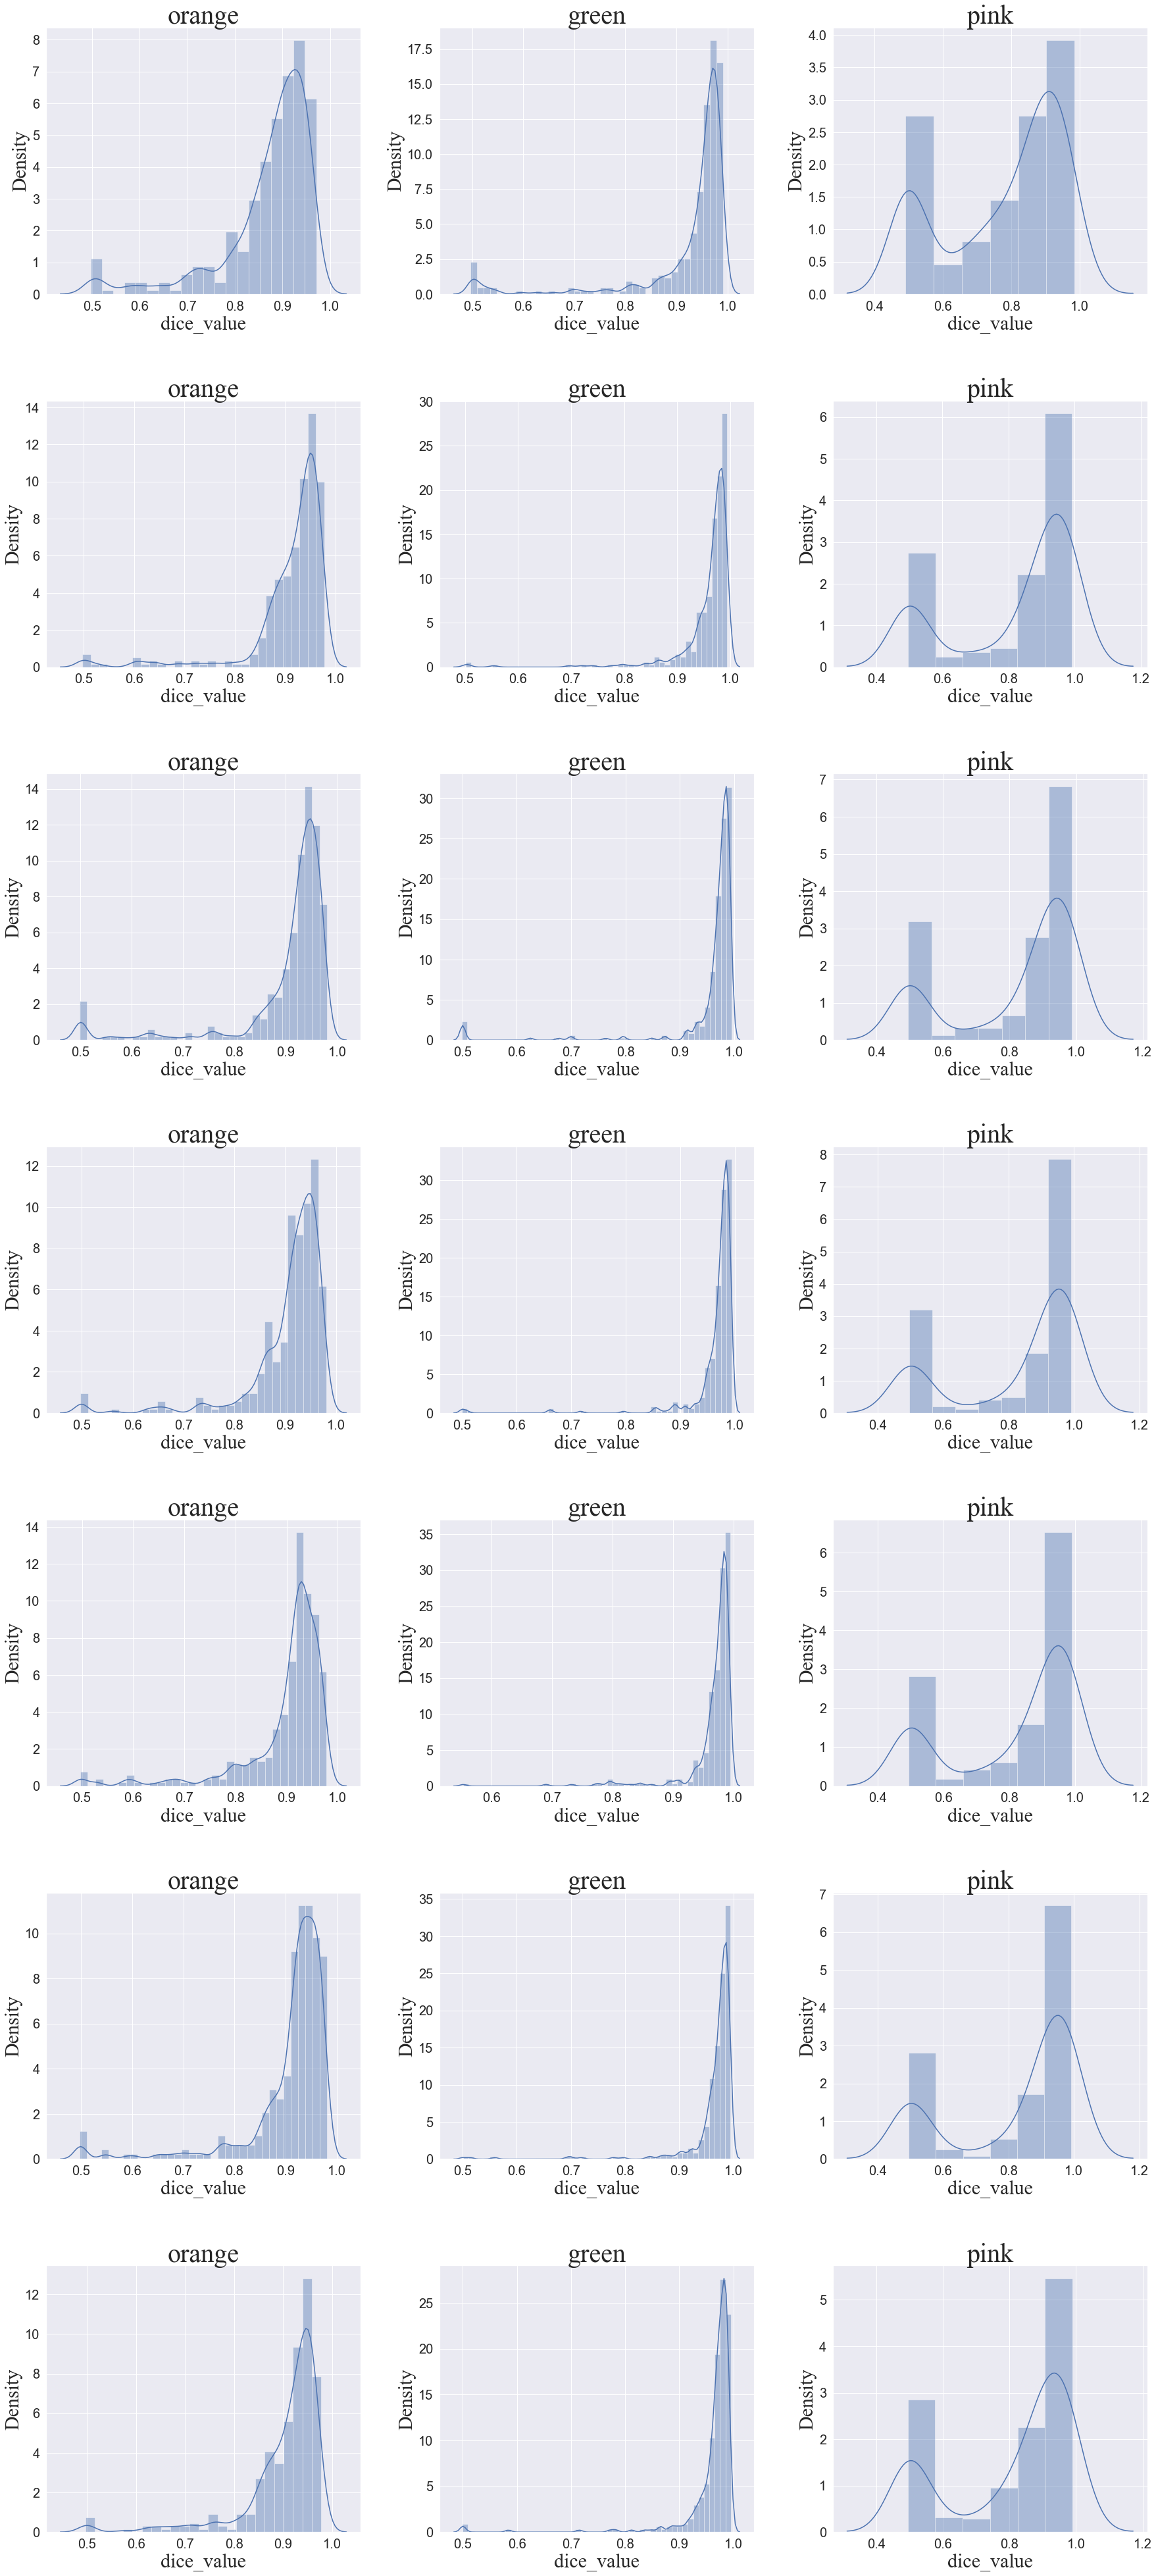

In [107]:
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig,axes=plt.subplots(7,3)#fig是整个画布
model_name = ["UNet_SGD", "UNet", "SCNN", "SRNN_V1", "SRNN_V2", "SCSRN_V1", "SCSRN_V2"]
tissue_name = ["orange", "green", "pink"]

for row in range(7):
    for col in range(3):
        model_item = model_name[row]
        tissue_item = tissue_name[col]

        ax_cur = sns.distplot(df[df["model_name"]==model_item][df["tissue_type"]==tissue_item                           ]["dice_value"],ax=axes[row][col])
        ax_cur.set_title(tissue_name[col], fontsize=40, fontname="Times New Roman")

         # name of sub-figure labels
        ax_cur.set_ylabel("Density",fontsize=30, fontname='Times New Roman')
        ax_cur.set_xlabel("dice_value",fontsize=30, fontname='Times New Roman')
        # fontname and size of sub-figure labels
        # x1_label = axes[row][col].get_xticklabels()
        # [x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
        # [x1_label_temp.set_size(30) for x1_label_temp in x1_label]
        # y1_label = axes[row][col].get_yticklabels()
        # [y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
        # [y1_label_temp.set_size(30) for y1_label_temp in y1_label]
        # font-attribute of sub-figure ticks
        ax_cur.tick_params(axis='y', labelsize=20)
        ax_cur.tick_params(axis='x', labelsize=20)

        plt.subplots_adjust(wspace=0.25, hspace=0.4)

# fig.suptitle("Dice Accuracy", fontsize=25, fontname="Times New Roman")
fig.set_figwidth(30)#这个是设置整个图（画布）的大小
fig.set_figheight(70)

plt.savefig(os.path.join(save_folder_path, dist_filename))